<a href="https://colab.research.google.com/github/AI-FREE-Team/Machine-Learning-Basic/blob/master/Materials/%E8%A6%96%E8%A6%BA%E5%8C%96_%E7%9B%92%E9%AC%9A%E5%9C%96_%E7%86%B1%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/README_imgs/aifreeteam.png) 
<center>Welcome to the course《Python: from business analytics to Artificial Intelligence》by AI . FREE Team.</center>
<center>歡迎大家來到 AI . FREE Team 《Python 從商業分析到人工智慧》的第二堂課 - 機器學習(ML)基礎教學。 </center>
<br/>

<center>作者: Michelle Chuang (<a href="https://github.com/sueshow">Github</a>)</center>
<center>AI . FREE Team: <a href="https://aifreeblog.herokuapp.com/">https://aifreeblog.herokuapp.com/</a></center>
<br>

# 前言

本文開始帶領大家以視覺化的統計圖表探索資料，將介紹 <font color="#00dd00">**Box Plot**</font> 和 <font color="#00dd00">**Heatmap**</font> ，讓大家瞭解如何善用統計圖表說明資料。

## 匯入基本套件

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt   # 繪製影像 
import seaborn as sns

print( 'NumPy 版本: ', np.__version__ )
print( 'Pandas 版本: ', pd.__version__ )  
print( 'Matplotlib 版本: ', matplotlib.__version__ )
print( 'Seaborn 版本: ', sns.__version__ )

NumPy 版本:  1.19.5
Pandas 版本:  1.1.5
Matplotlib 版本:  3.2.2
Seaborn 版本:  0.11.1


# 盒鬚圖 (Box Plot)

## 小範例

* 指令：`.boxplot()`
* 適用：完整呈現數值分布的統計圖表，如：薪資水平
* 參數
  * index：x軸
* 說明：
  * 箱形圖顯示數據的總體分布，同時繪製異常值的數據點。這個物理點讓它們的特定值在樣本之間容易被識別和比較
  * 分布的擴散差不多是相等的，並且可以很容易地比較異常值

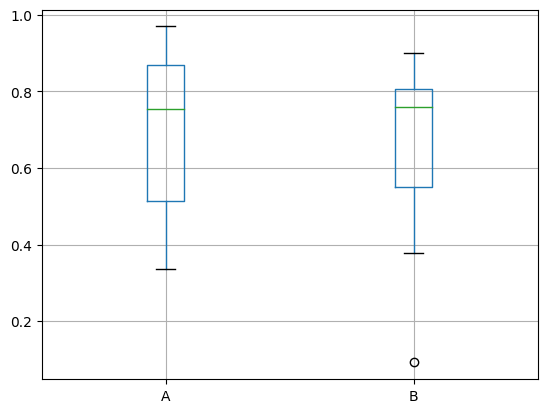

In [ ]:
plt.style.use( 'default' )
df = pd.DataFrame(np.random.rand(10,2), columns=['A','B'])
df.boxplot()
plt.show()

## 實作範例 - Iris Dataset

### 匯入資料

In [ ]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()    # 回傳格式為dictionary，將一個dict型別資料存入iris

In [ ]:
iris_feature = pd.DataFrame( iris['data'], columns=iris['feature_names'] )
iris_class = pd.DataFrame( iris['target'], columns=['target_names'] )

iris_data = pd.concat( [iris_feature, iris_class], axis=1)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 繪圖

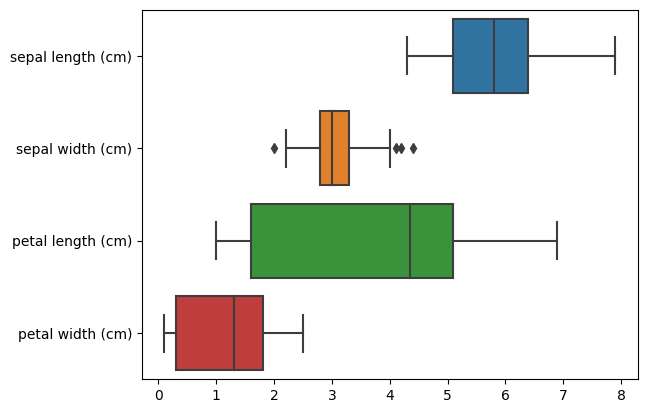

In [ ]:
sns.boxplot(data=iris_feature, orient='h')
plt.show()

## 實作範例 - Wine Reviews

### 匯入資料

首先，透過程式碼將資料集檔案 (excel) 從 GitHub 下載

In [ ]:
!git clone https://github.com/AI-FREE-Team/Machine-Learning-Basic.git

Cloning into 'Machine-Learning-Basic'...
remote: Enumerating objects: 291, done.
remote: Counting objects: 100% (291/291), done.
remote: Compressing objects: 100% (236/236), done.
remote: Total 291 (delta 130), reused 153 (delta 48), pack-reused 0
Receiving objects: 100% (291/291), 28.75 MiB | 23.99 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [ ]:
#若需要重新下載資料，先執行下面的語法：
#!rm -r /content/Machine-Learning-Basic

* 資料來源：自 Kaggle 上 [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) 取得
* 資料說明：在 2017 年 6 月 15 日那周從 [WineEnthusiast](https://www.winemag.com/?s=&drink_type=wine) 取得

In [ ]:
wine_reviews = pd.read_csv('/content/Machine-Learning-Basic/Content/Wine_Rviews/winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### 繪圖

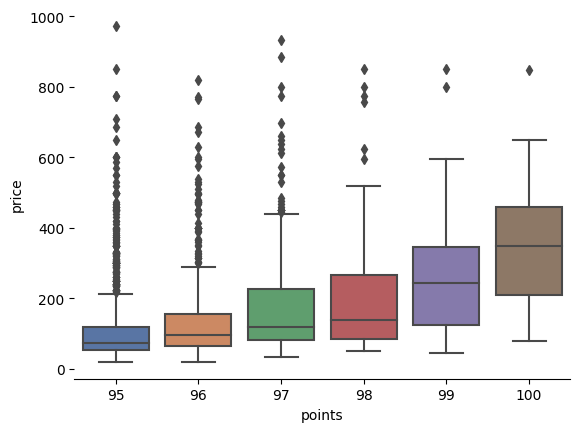

In [ ]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]

# 使用其他參數控制刪除哪些刺 despine()
sns.boxplot(x='points', y='price', data=df, palette='deep')
sns.despine(left=True)
plt.show()

# Violinplot

## 實作範例 - Iris Dataset

### 匯入資料

要記得確認 Iris Data 是否已匯入，如果還沒有的話，請參考圖匯入 Iris Data 囉！

### 繪圖

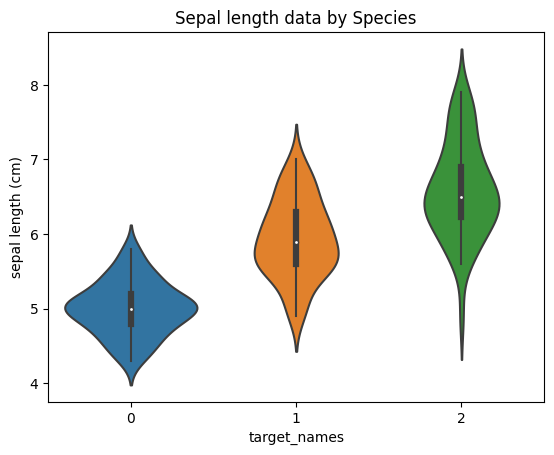

In [ ]:
sns.violinplot( x='target_names', y='sepal length (cm)', data=iris_data )
plt.title('Sepal length data by Species')
plt.show()

#### 結合 boxplot 與 violinplot

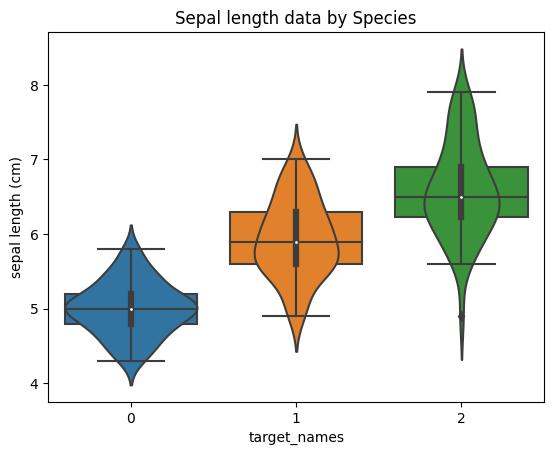

In [ ]:
sns.boxplot( x='target_names', y='sepal length (cm)', data=iris_data )
sns.violinplot( x='target_names', y='sepal length (cm)', data=iris_data )
plt.title('Sepal length data by Species')
plt.show()

# 熱圖 (Heatmap)

## 小範例

* 以顏色變化來顯示數據的矩陣，不過在這裡以離散型的為主，其中兩個元素之間的關係量級由色調表示

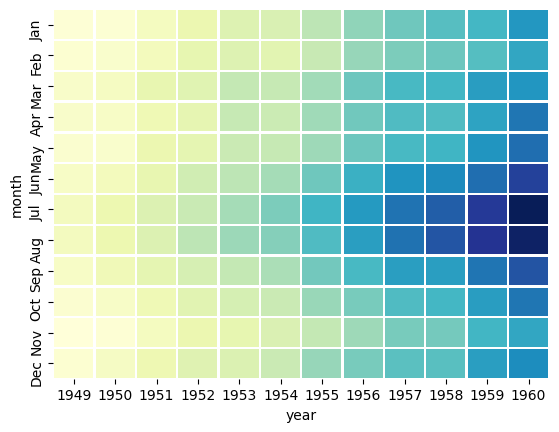

In [ ]:
plt.style.use( 'default' )
flights = sns.load_dataset('flights') # 載入航班數據	
flights = flights.pivot('month', 'year', 'passengers') # 修改數據排列

# 劃分每格單元的行寬度，使用不同的colormap，取消顏色條
sns.heatmap(flights, linewidths=1 , cmap='YlGnBu', cbar=False) 
plt.show()

## 實作範例 - Iris Dataset

### 匯入資料

要記得確認 Iris Data 是否已匯入，如果還沒有的話，請參考圖匯入 Iris Data 囉！

In [ ]:
# get correlation matrix
corr = iris_data.corr()

### 繪圖

#### imshow

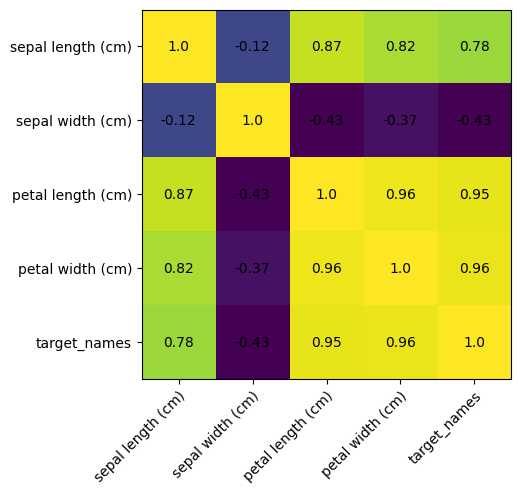

In [ ]:
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
         rotation_mode='anchor')

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha='center', va='center', color='black')
        
plt.show()

#### heatmap

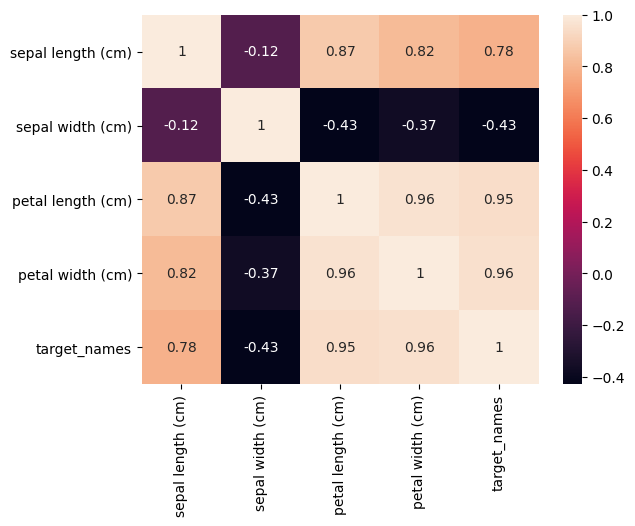

In [ ]:
sns.heatmap(iris_data.corr(), annot=True)
plt.show()

# 結論

如同 Wikipedia 所述，有效的視覺化可以幫助用戶分析和推理資料和證據。它使複雜的資料更容易理解、理解和使用。當日後在進行資料分析時，建議讀者官方文件 [Matplotlib Tutorial](https://matplotlib.org/stable/tutorials/index.html) 及 [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) 尋找方法，以累積程式除錯的能力與經驗。<br>
針對本文的內容，若讀者們有發現任何的錯誤或疑問，非常歡迎您 [來信 sueshow2006@gmail.com](mailto:sueshow2006@gmail.com) 給予建議及討論，讓我們一同來學習成長！

# 參考資料

* [Select by partial string from a pandas DataFrame](https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe)
* [Titanic - Feature understanding from Plots](https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots)
* [Titanic Analysis_Learning to Swim with Python](https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python)
* [python pandas pivot_table count frequency in one column](https://stackoverflow.com/questions/22412033/python-pandas-pivot-table-count-frequency-in-one-column)  
* [matplotlib (上)](https://blog.csdn.net/bryant_meng/article/details/80980820)
* [matplotlib and seaborn (下)](https://blog.csdn.net/bryant_meng/article/details/86383749)
* [How to delete the last row of data of a pandas dataframe](https://stackoverflow.com/questions/26921651/how-to-delete-the-last-row-of-data-of-a-pandas-dataframe) 
* [如何在 Colab 中透過 Kaggle API 下載資料集](https://blog.toright.com/posts/6817/%E5%A6%82%E4%BD%95%E5%9C%A8-colab-%E4%B8%AD%E9%80%8F%E9%81%8E-kaggle-api-%E4%B8%8B%E8%BC%89%E8%B3%87%E6%96%99%E9%9B%86.html)

# 返回 [課程大綱](https://github.com/AI-FREE-Team/Machine-Learning-Basic)